In [3]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

In [4]:
import torch

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 4060 Laptop GPU'

# Started Daniel's 1 day PyTorch course
## Drifted to Andrej's NN: 0 to HERO playlist
## Realized to seriously learn Neural Nets so chose this playlist

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
def f(x):
    return 3*x**2 - 4*x +5


#Its just a simple quadratic expression 3x^2-4x+5

In [10]:
f(3.0)

20.0

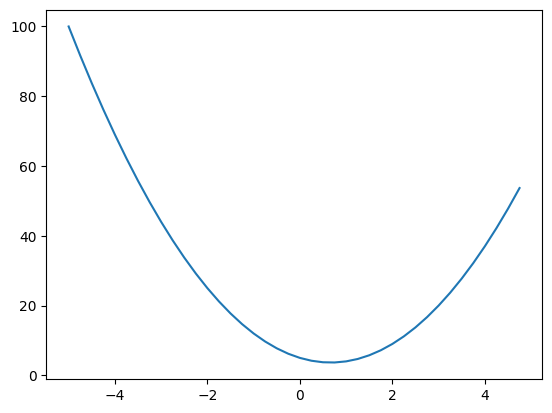

In [11]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs,ys)

In [12]:
h = 0.000001
x = 3.0
(f(x + h) - f(x))/h

14.000003002223593

In [13]:
# Adding a bit spice to these calculations
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
#a,b,c,d are inputs

print(d)

4.0


In [14]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1:', d1)
print('d2:', d2)
print('Slope of bump from d1 to d2')
print((d2-d1)/h)

d1: 4.0
d2: 4.0001
Slope of bump from d1 to d2
0.9999999999976694


In [15]:
import math

In [186]:

 #   def __sub__(self, other):
 #       other = other if isinstance(other, Value) else Value(other)
 #      out = Value(self.data - other.data, (self, other), '-')
 #       
 #       def _backward():
 #           self.grad -= 1.0 * out.grad
 #           other.grad -= 1.0 * out.grad
 #       out._backward = _backward
        
 #       return out
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda: None
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)  # Ensure other is a Value
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __radd__(self, other):  # For cases like sum(list_of_Value)
        return self + other

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) # Ensure other is a Value
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data**(other-1)) * out.grad
        out._backward = _backward

        return out

    def __rmul__(self, other):
        return self * other

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def tanh(self):
        t = (math.exp(2*self.data) - 1)/(math.exp(2*self.data) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward   

        
        return out  
        
    def backward(self):

        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for v in reversed(topo):
            v._backward()

In [76]:
a = Value(2.0)
b = Value(1.0)
a - b


Value(data=1.0, grad=0)

In [18]:
!uv pip install graphviz

Using Python 3.11.11 environment at: nvigpu
Audited 1 package in 10ms


In [187]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    dot  = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #creating a rectangular record node for label and the data it holds
        dot.node(name = uid, label = '{ %s | data %.4f | grad %.4f}' % (n.label, n.data, n.grad), shape='record')
        if n._op:
            #creating a operation node where it just a showcase of the current operation being performed for the Values
            dot.node(name=uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot    

In [188]:
def lol():

    h = 0.001

    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data 

    print((L2 - L1)/h)

lol()    

-3.9999999999995595


In [189]:
!uv pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

Using Python 3.11.11 environment at: nvigpu
Audited 1 package in 11ms


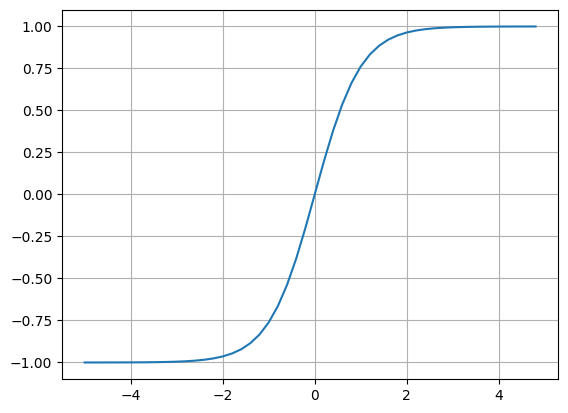

In [190]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

## CODING THE NEURON

In [ ]:
#INPUTS
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#WEIGHTS
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#BIAS
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

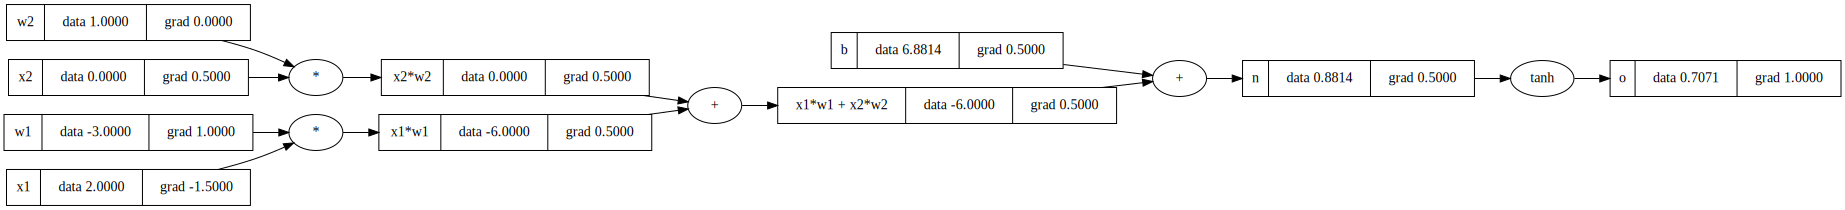

In [70]:
draw_dot(o)

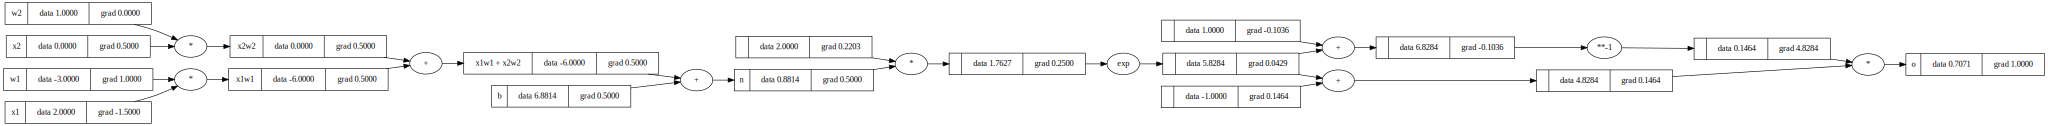

In [191]:
#INPUTS
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
#WEIGHTS
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
#BIAS
b = Value(6.8813735870195432, label='b')
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
e = (2*n).exp()
o = (e - 1)/ (e + 1)
o.label = 'o'
o.backward()
draw_dot(o)

In [192]:
dot = draw_dot(o)
dot.render("output_graph", format="png", cleanup=True)

'output_graph.png'

In [193]:
import torch

In [194]:
x1 = torch.Tensor([2.0]).double()              ;         x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()              ;         x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()             ;        w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()              ;         w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
-----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [276]:
import random
import math

In [287]:
class Neuron:

    def __init__(self,nin):
        self.w  =[Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self,x):
        # w *x+b
        act = sum((w1 * x1 for w1, x1 in zip(self.w, x)), Value(0.0)) + self.b
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]

class Layer:

    def __init__(self,nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self,x):
        # w *x+b
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]            

class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()] 


In [288]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4 ,4 ,1])
n(x)

Value(data=0.1915728697712548)

In [279]:
n.parameters() # All the weights and biases

[Value(data=-0.811005684157833),
 Value(data=0.5758334048971792),
 Value(data=-0.3725045609520019),
 Value(data=0.12041798913544954),
 Value(data=0.7704751773572414),
 Value(data=0.0058276307526377025),
 Value(data=-0.37162931258090093),
 Value(data=-0.12299700655792445),
 Value(data=0.11621715882264394),
 Value(data=-0.5291230468780876),
 Value(data=-0.5524126350829479),
 Value(data=-0.3318278955732914),
 Value(data=-0.996505961828106),
 Value(data=-0.6299442050032242),
 Value(data=0.49678353571637013),
 Value(data=-0.533764222616163),
 Value(data=0.9429253759154439),
 Value(data=0.8002780990608682),
 Value(data=0.6066120142818103),
 Value(data=0.2589681702842044),
 Value(data=-0.6555328882982729),
 Value(data=0.6657935643159592),
 Value(data=-0.14514151457782765),
 Value(data=0.9656535539139255),
 Value(data=-0.3499925796838428),
 Value(data=-0.530455290296183),
 Value(data=-0.9395667318953516),
 Value(data=0.9362253092027297),
 Value(data=-0.20617573459015515),
 Value(data=-0.078311

In [ ]:
dot = draw_dot(o)
dot.render("output_graph", format="png", cleanup=True)

In [289]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=2.115361800615416e-24)

In [331]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

## Gradient descent

In [332]:
for k in range(20):
    #forward pass
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    #backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    #update
    for p in n.parameters():
        p.data += -0.05 * p.grad

    print(k, loss.data)    

0 0.002646203815280917
1 0.002636105322515778
2 0.0026260817369014736
3 0.0026161322371420943
4 0.002606256013827847
5 0.0025964522692217837
6 0.002586720217050896
7 0.002577059082301911
8 0.0025674681010212533
9 0.0025579465201193735
10 0.00254849359717903
11 0.002539108600267775
12 0.002529790807754244
13 0.0025205395081284248
14 0.0025113539998254833
15 0.002502233591053377
16 0.002493177599624038
17 0.0024841853527878886
18 0.0024752561870719247
19 0.0024663894481210297


In [333]:
ypred

[Value(data=0.981554555931276),
 Value(data=-0.9786405026457327),
 Value(data=-0.9721966657220117),
 Value(data=0.9700516859067477)]